### Building a linear regression model for diabete progression Problem
---

Using linear regression model to predict the progress diabete progression based on BMI

Building linear rgression models with Cross-Validation
Using Hyperparameter Tuning Using Grid Search Cross-Validation


In [1]:
# importing the requierd pakages:
import pandas as pd
import numpy as np
import datetime
import time
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor, RANSACRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from numpy import absolute


%config InlineBackend.figure_format='retina'
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.labelpad'] = 10
sns.set_style("darkgrid")

In [2]:
# Loading the dataset using pandas
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


1- dividing the data into features (X) and target (y)

In [4]:
X = df.drop(columns = ['bmi'])



In [5]:
y = df['bmi']

In [6]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,dpf,age,diabetes
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1


In [7]:
y.head()

0    33.6
1    26.6
2    23.3
3    28.1
4    43.1
Name: bmi, dtype: float64

2- Plotting scatter plot to get a better idea of the effect of each feature on the target variable BMI

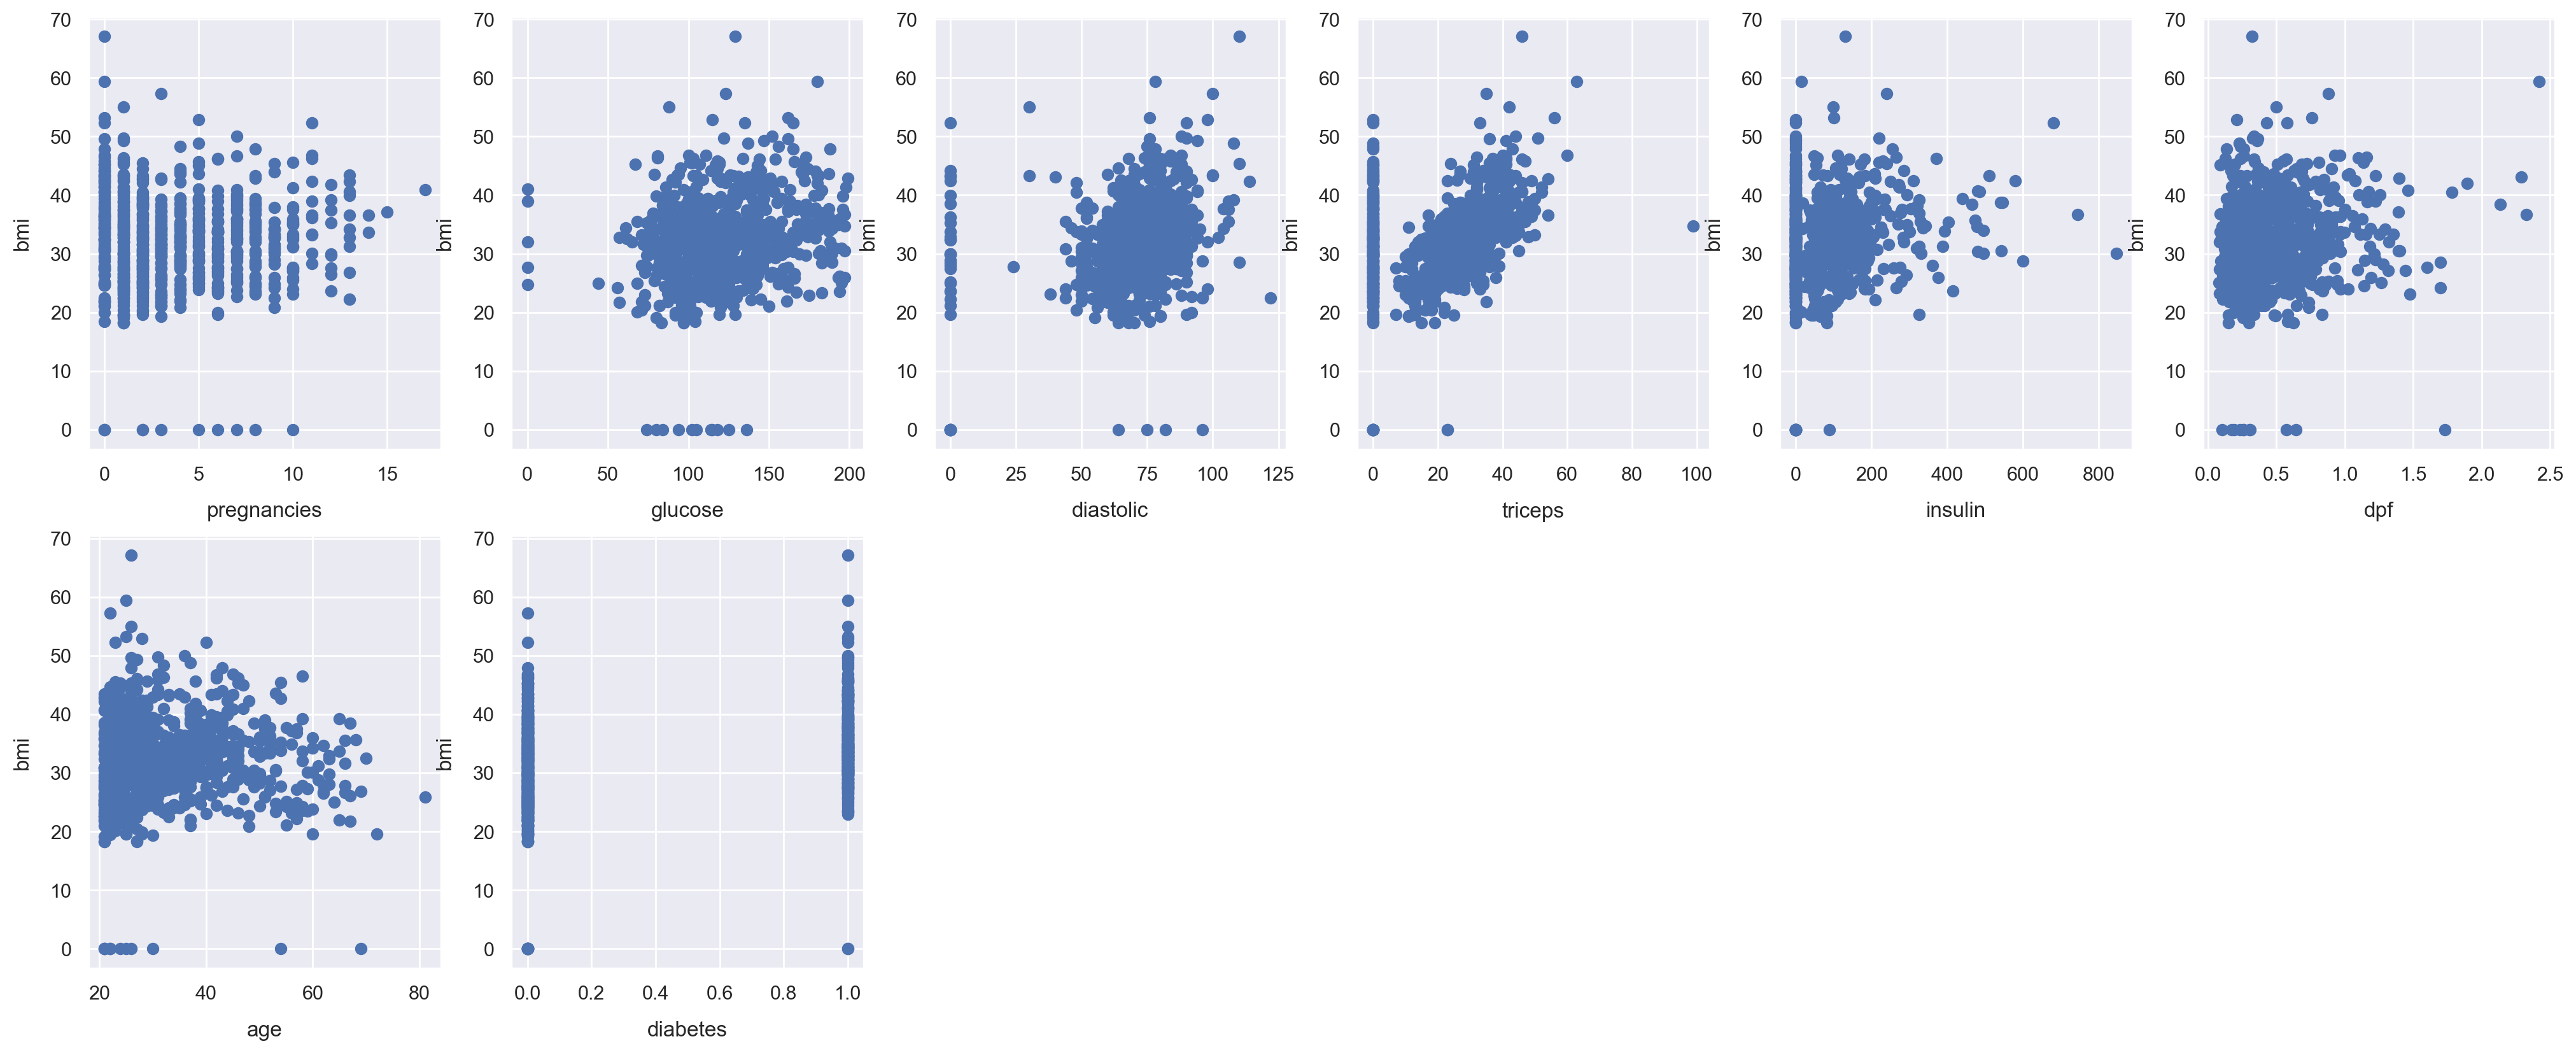

In [8]:
# write your code here:
plt.figure(figsize = ( 25 , 15 )) 
features = list (X) 
for i, col in enumerate (features): 
    plt.subplot(3 , 6 ,i +1 ) 
    x = df[col] 
    y = y 
    plt.scatter(x, y, marker = 'o' )
    plt.xlabel(col) 
    plt.ylabel( 'bmi' )

3- Plotting the box plot to check for outliers using boxplot

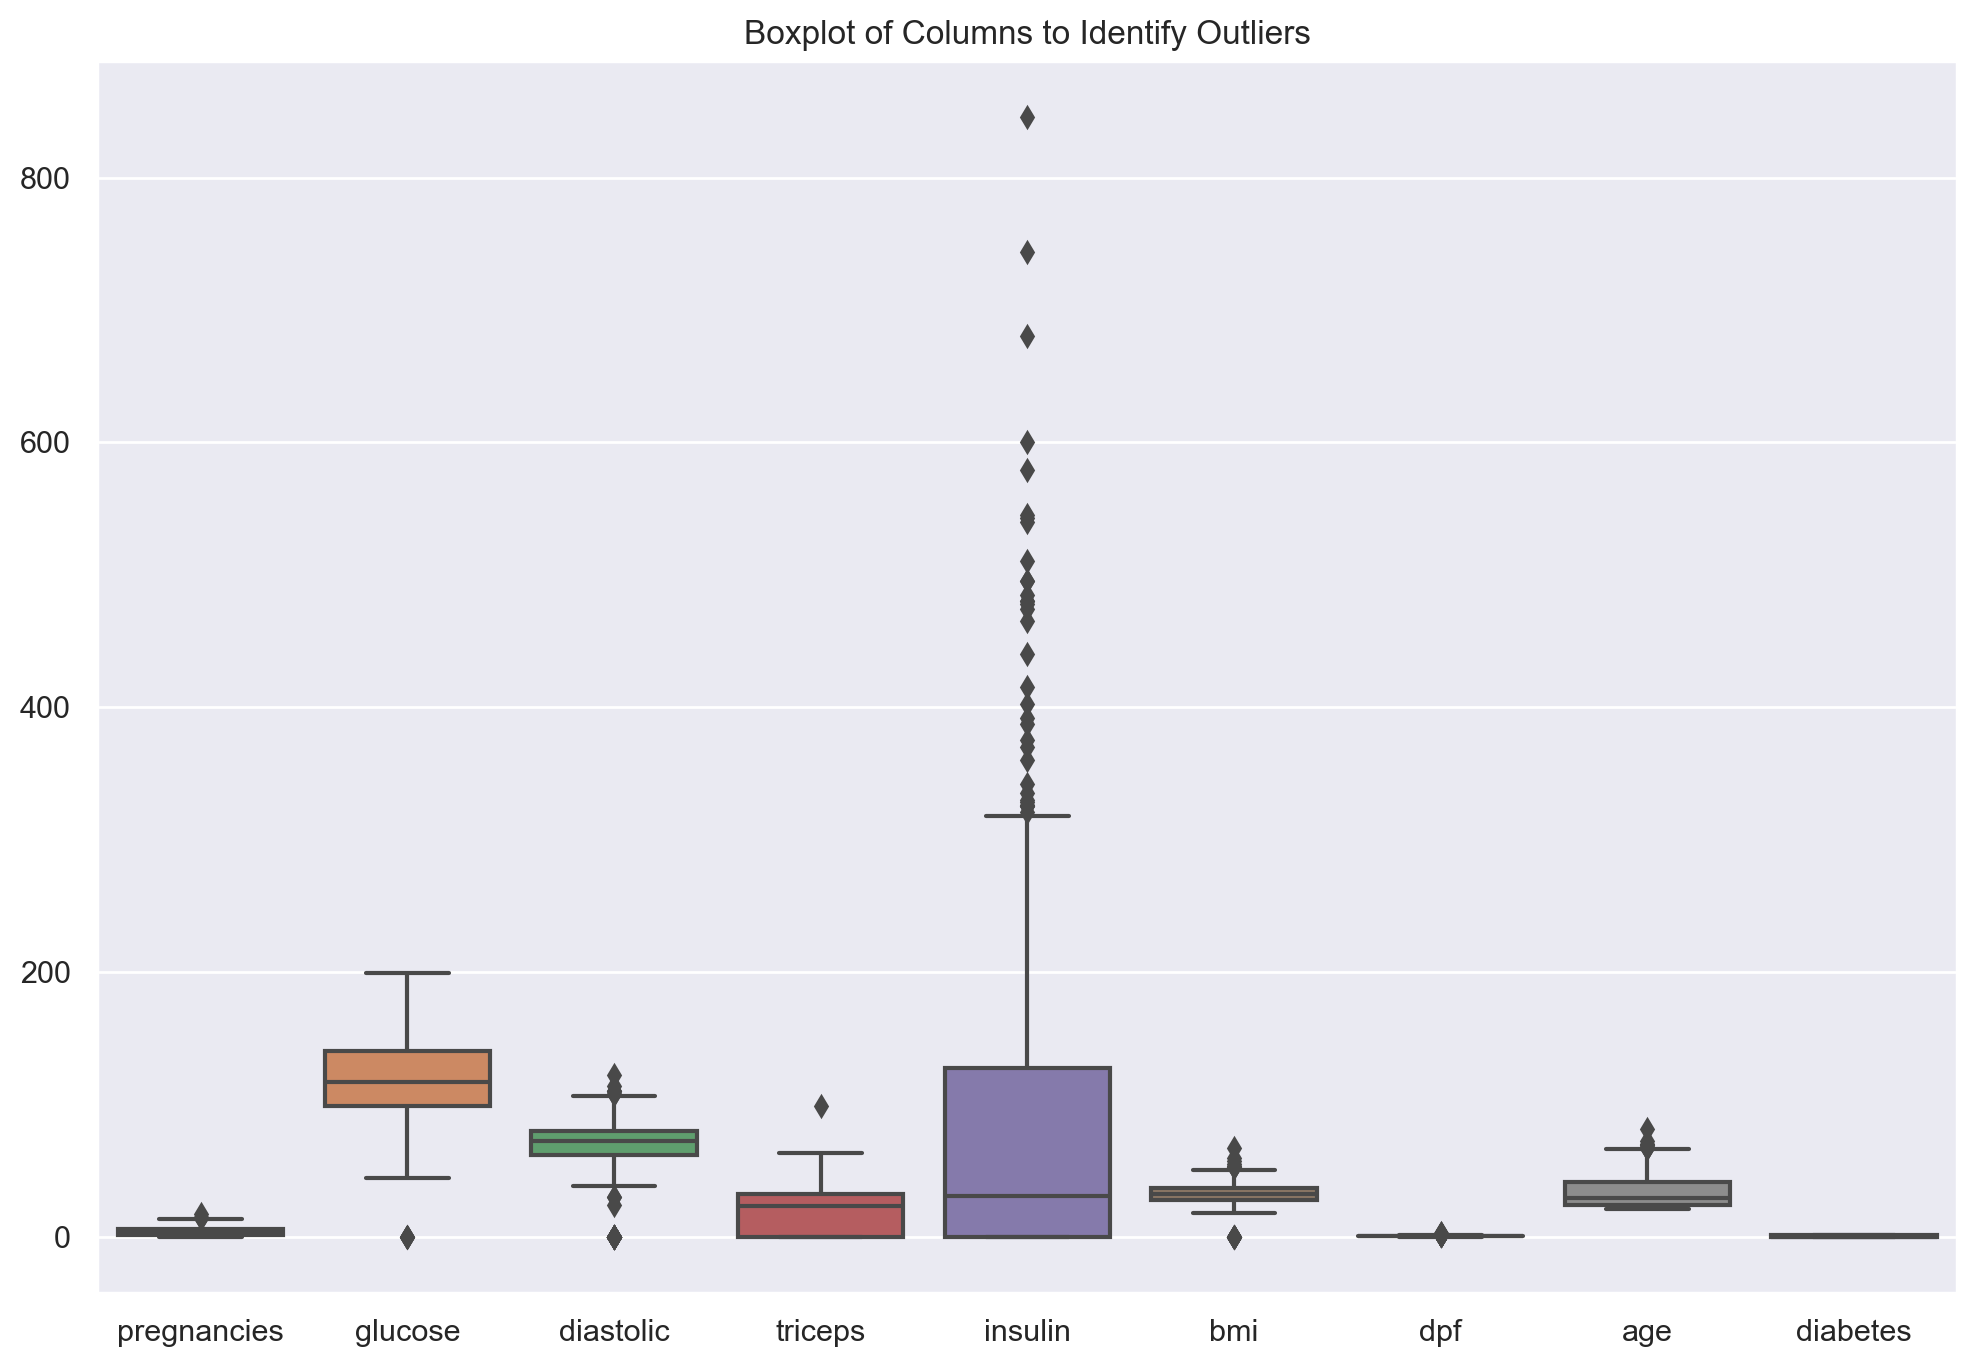

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title("Boxplot of Columns to Identify Outliers")
plt.show()

#### Yes, Outliers exist in Insulin feature. Moreover we need to scale the features



4. We train the model with 80% of the samples and test with the remaining 20%.

In [11]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

- Using pipeline to build linear regression model

In [13]:
from sklearn.pipeline import make_pipeline
pipeline = make_pipeline(StandardScaler(), LinearRegression())


- Model Evaluation

In [14]:
scores_pipe_1 = cross_val_score(pipeline, X_train, y_train,cv=5)
print("Average 5-Fold CV R2 Score: {}".format((np.mean(scores_pipe_1)) ))
scores_pipe_2 = cross_val_score(pipeline, X_train, y_train,cv=5, scoring='neg_mean_squared_error') # this return the negated value of the MSE, make sure to multiply it by -1 to get the positive one
print("Average 5-Fold CV MSE Score: {}".format(-1*(np.mean(scores_pipe_2)) ))

Average 5-Fold CV R2 Score: 0.22926817843285052
Average 5-Fold CV MSE Score: 45.421415712498046
